# Telcom Customer Churn Prediction - Exploratory Data Analysis

This notebook provides a comprehensive exploratory data analysis and data preparation for the telcom customer churn prediction project.

## Project Overview
- **Dataset**: Telcom Customer Churn Dataset
- **Objective**: Analyze customer behavior patterns and prepare data for churn prediction modeling
- **Target Variable**: Churn (Yes/No)

## Notebook Structure
1. Data Loading and Initial Inspection
2. Data Quality Analysis
3. Exploratory Data Analysis - Target Variable
4. Exploratory Data Analysis - Numeric Features
5. Exploratory Data Analysis - Categorical Features
6. Data Cleaning and Preprocessing
7. Feature Engineering
8. Data Encoding
9. Final Dataset Preparation

## 1. Data Loading and Initial Inspection

Let's start by importing the necessary libraries and loading the dataset.

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting style
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [15]:
# Load the dataset
df = pd.read_csv('Telco_Customer_Churn.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [16]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# Dataset information
df.info()
print("Data Types:")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
# Descriptive statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### **Initial Data Inspection Insights**

**Key Findings from Initial Analysis:**
- **Dataset Size**: 7,043 customers with 21 features
- **Data Quality**: All columns have complete records (no null values initially)
- **Feature Mix**: 18 categorical features (object type), 2 numeric integers, 1 float
- **Notable Issue**: `TotalCharges` is stored as object (text) instead of numeric - this needs investigation

**Customer Demographics Summary:**
- **Senior Citizens**: ~16.2% of customers are senior citizens
- **Tenure**: Average customer tenure is ~32 months (ranging from 0-72 months)
- **Monthly Charges**: Average $64.76/month (ranging from $18.25-$118.75)
- **Tenure Distribution**: Median tenure is 29 months, indicating a fairly balanced customer base

**Next Steps**: Need to investigate the TotalCharges column and check for data quality issues.

## 2. Data Quality Analysis

Let's examine the data quality by checking for duplicates, missing values, and data inconsistencies.

In [19]:
# Check for duplicate records
print(f"Total rows: {len(df)}")
print(f"Unique rows: {len(df.drop_duplicates())}")
print(f"Duplicate rows: {len(df) - len(df.drop_duplicates())}")

# Check for duplicate customerIDs
duplicate_customers = df['customerID'].duplicated().sum()
print(f"Duplicate customer IDs: {duplicate_customers}")

Total rows: 7043
Unique rows: 7043
Duplicate rows: 0
Duplicate customer IDs: 0


In [20]:
# Check TotalCharges for data quality issues (spaces instead of numbers)
print(f"TotalCharges data type: {df['TotalCharges'].dtype}")
print(f"Sample TotalCharges values:")
print(df['TotalCharges'].head(10))

# Check for non-numeric values in TotalCharges
non_numeric_total_charges = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print(f"\nRows with non-numeric TotalCharges: {len(non_numeric_total_charges)}")

if len(non_numeric_total_charges) > 0:
    print("Non-numeric TotalCharges values:")
    print(non_numeric_total_charges[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())

TotalCharges data type: object
Sample TotalCharges values:
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

Rows with non-numeric TotalCharges: 11
Non-numeric TotalCharges values:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             


### **Data Quality Analysis Insights**

- **No Duplicate Records**
- **No Missing Values**

**Critical Data Quality Issue Identified:**
- **TotalCharges Problem**: 11 customers have **empty space characters** instead of numeric values
- **Pattern Identified**: All problematic records have `tenure = 0` (new customers)
- **Root Cause**: New customers (0 tenure) should have $0 total charges, but data entry used spaces

**Impact Assessment:**
- **Affected Records**: 11 out of 7,043 (0.16% of dataset)
- **Business Logic**: New customers (0 tenure) logically should have $0 total charges
- **Data Type Issue**: TotalCharges stored as text instead of numeric prevents mathematical operations

**Cleaning Strategy:**
1. Convert TotalCharges to numeric format
2. Replace space characters with 0 for new customers
3. Validate that tenure=0 customers have appropriate total charges

## 3. Exploratory Data Analysis - Target Variable

Let's analyze the distribution of our target variable (Churn) to understand the class balance.

Absolute counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentages:
No: 73.46%
Yes: 26.54%


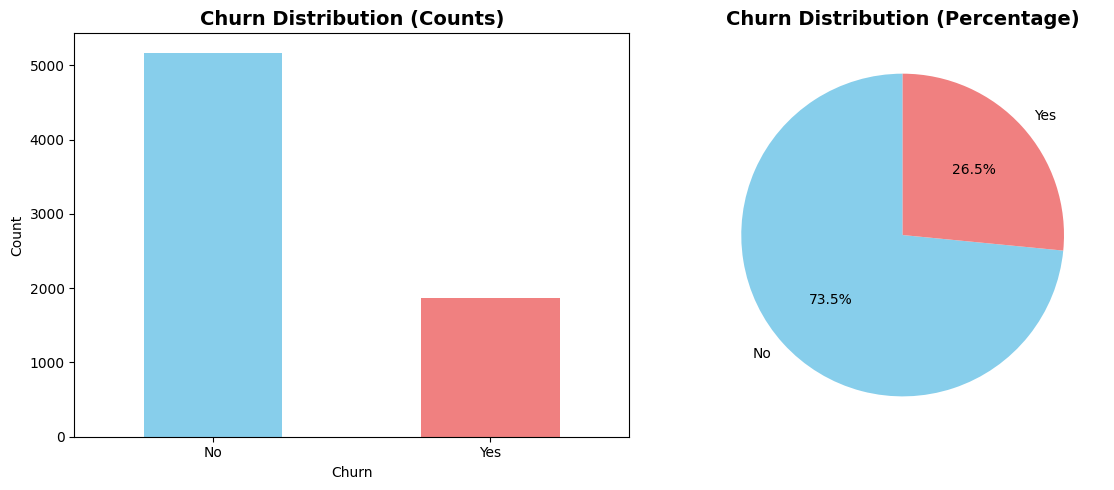

In [21]:
# Target variable analysis
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Absolute counts:")
print(churn_counts)
print("\nPercentages:")
for label, pct in churn_percentage.items():
    print(f"{label}: {pct:.2f}%")

# Visualize churn distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
churn_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Churn Distribution (Counts)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Churn')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
ax2.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral'], startangle=90)
ax2.set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### **Target Variable Analysis Insights**

**Churn Distribution Summary:**
- **Retention Rate**: 73.46% of customers stayed (5,174 customers)
- **Churn Rate**: 26.54% of customers left (1,869 customers)
- **Class Ratio**: Approximately 3:1 ratio (retained vs churned)

**Business Implications:**
- **Moderate Churn Rate**: 26.54% is significant enough to warrant attention and intervention
- **Balanced Dataset**: Not severely imbalanced - good for machine learning models
- **Business Impact**: With ~1,869 customers churning, there's substantial revenue at risk

**Modeling Considerations:**
-  **Not Severely Imbalanced**: 26.54% positive class is reasonable for most ML algorithms
-  **Sufficient Samples**: Both classes have enough samples for robust model training
-  **Baseline Accuracy**: A naive model predicting "No Churn" would achieve 73.46% accuracy

**Key Questions for Further Analysis:**
- What factors drive the 26.54% churn rate?
- Can we identify high-risk customer segments?
- What interventions might reduce churn?

## 4. Exploratory Data Analysis - Numeric Features

Let's analyze the numeric features and their relationship with churn.

In [22]:
# First, let's clean TotalCharges for analysis
df_clean = df.copy()
# Convert TotalCharges to numeric, replacing non-numeric values with NaN
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Identify numeric columns
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

print("Numeric Features Summary:")
for col in numeric_columns:
    print(f"\n{col}:")
    print(f"  Min: {df_clean[col].min()}")
    print(f"  Max: {df_clean[col].max()}")
    print(f"  Mean: {df_clean[col].mean():.2f}")
    print(f"  Std: {df_clean[col].std():.2f}")
    print(f"  Missing: {df_clean[col].isnull().sum()}")

Numeric Features Summary:

tenure:
  Min: 0
  Max: 72
  Mean: 32.37
  Std: 24.56
  Missing: 0

MonthlyCharges:
  Min: 18.25
  Max: 118.75
  Mean: 64.76
  Std: 30.09
  Missing: 0

TotalCharges:
  Min: 18.8
  Max: 8684.8
  Mean: 2283.30
  Std: 2266.77
  Missing: 11

SeniorCitizen:
  Min: 0
  Max: 1
  Mean: 0.16
  Std: 0.37
  Missing: 0


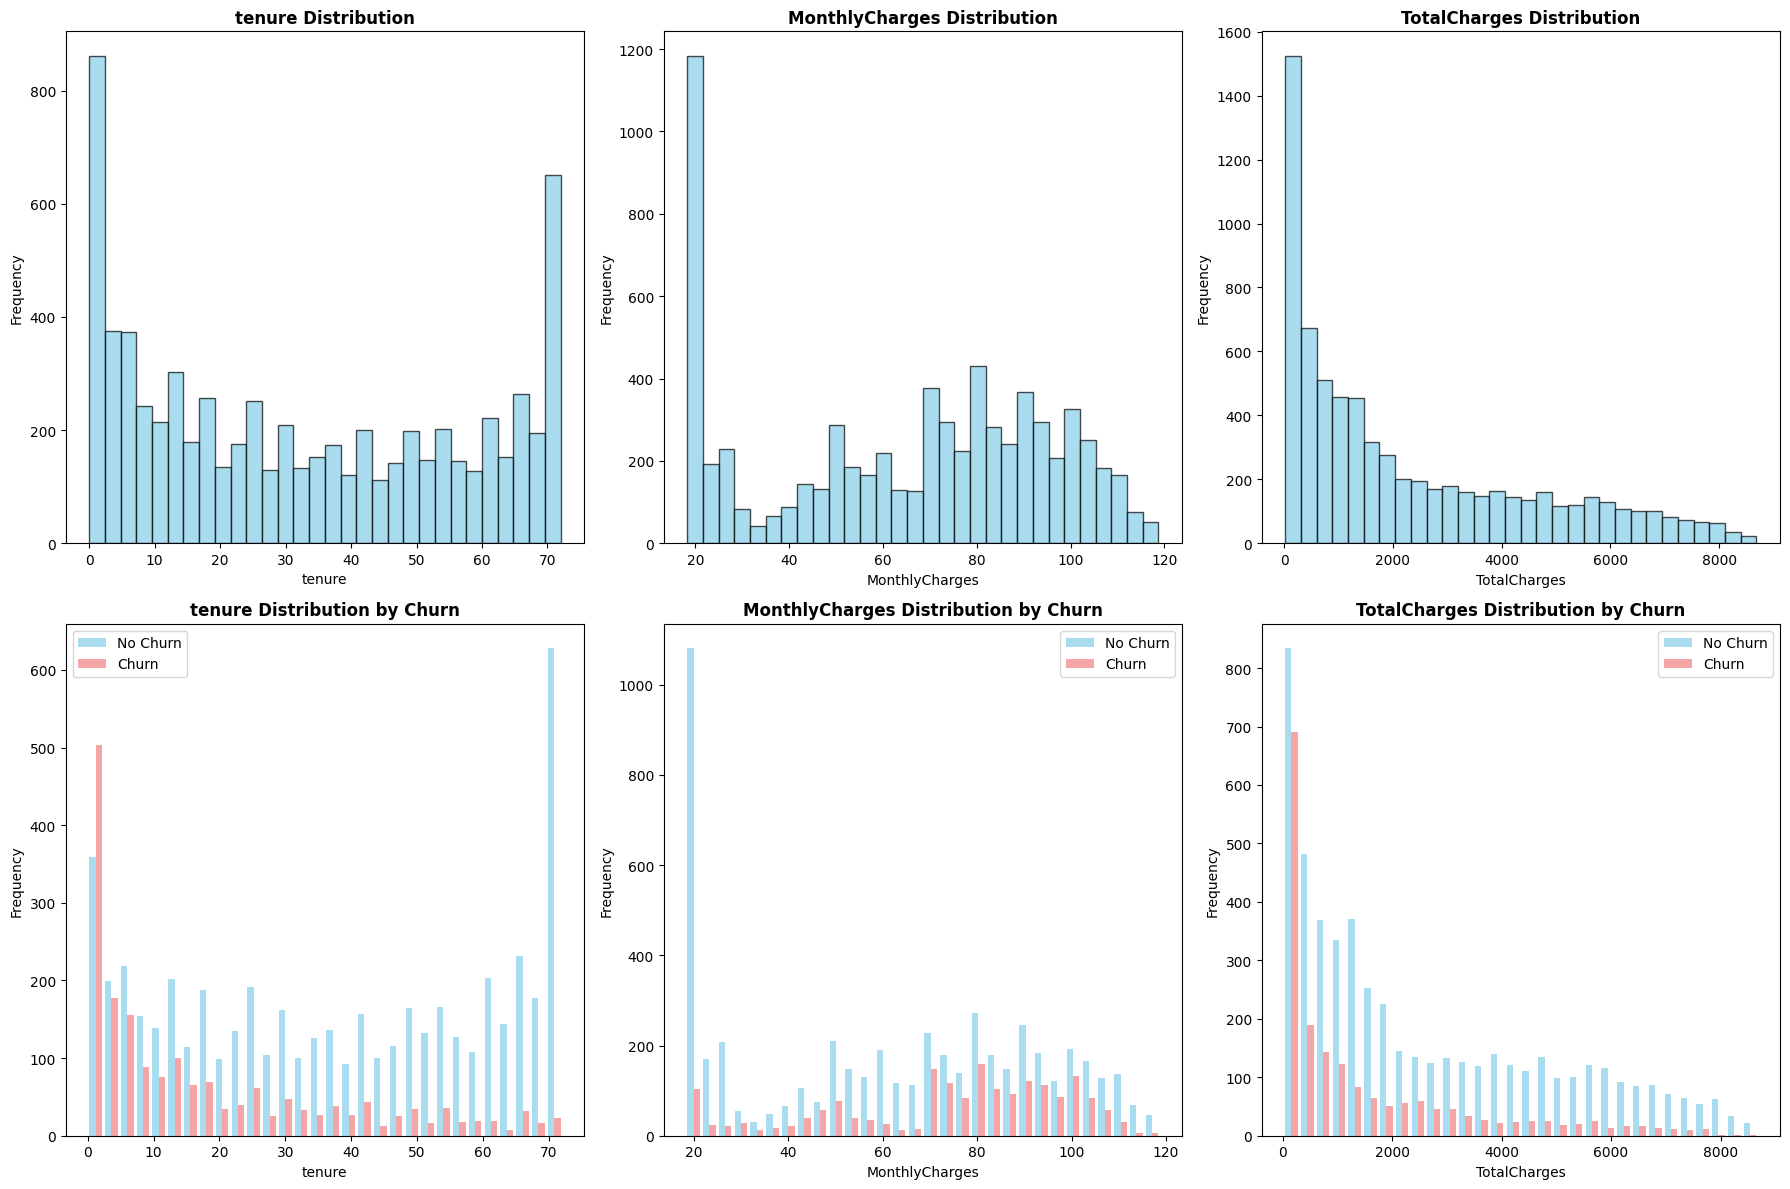

In [23]:
# Distribution plots for numeric features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    # Overall distribution
    axes[i].hist(df_clean[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
    # Distribution by churn
    axes[i+3].hist([df_clean[df_clean['Churn']=='No'][col].dropna(), 
                    df_clean[df_clean['Churn']=='Yes'][col].dropna()], 
                   bins=30, alpha=0.7, label=['No Churn', 'Churn'], 
                   color=['skyblue', 'lightcoral'])
    axes[i+3].set_title(f'{col} Distribution by Churn', fontsize=12, fontweight='bold')
    axes[i+3].set_xlabel(col)
    axes[i+3].set_ylabel('Frequency')
    axes[i+3].legend()

plt.tight_layout()
plt.show()

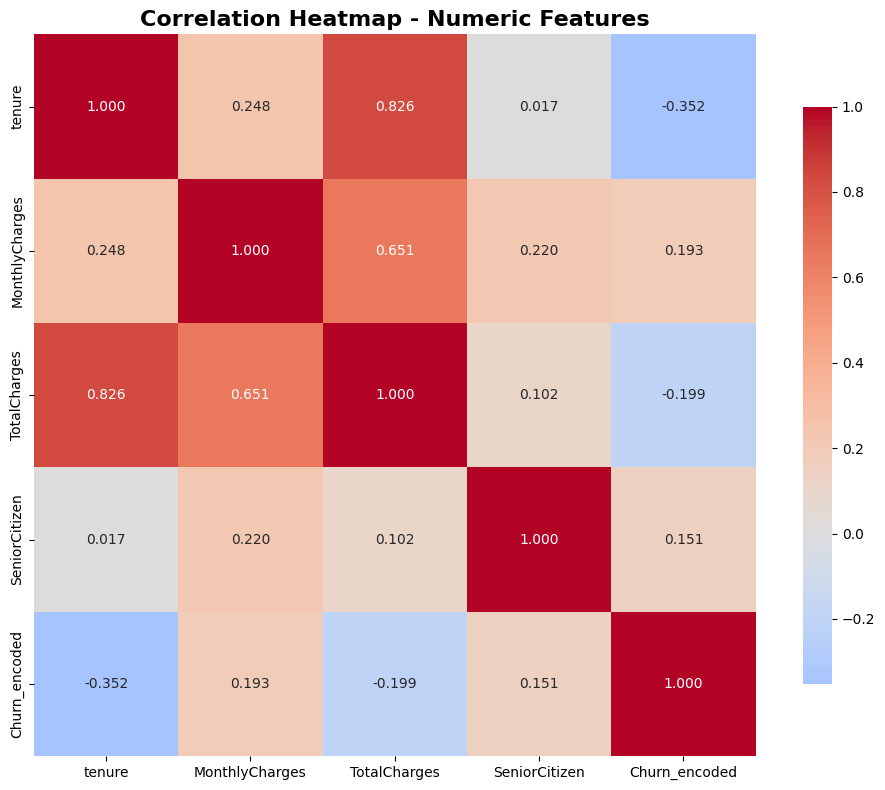

Correlation with Churn:
tenure: -0.352
TotalCharges: -0.199
MonthlyCharges: 0.193
SeniorCitizen: 0.151


In [24]:
# Correlation heatmap
# Create a subset with numeric columns and encoded target
df_numeric = df_clean[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']].copy()
df_numeric['Churn_encoded'] = (df_clean['Churn'] == 'Yes').astype(int)

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap - Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation with Churn:")
churn_corr = correlation_matrix['Churn_encoded'].drop('Churn_encoded').sort_values(key=abs, ascending=False)
for feature, corr in churn_corr.items():
    print(f"{feature}: {corr:.3f}")

### **Numeric Features Analysis Insights**

**Key Distribution Patterns:**
- **Tenure**: Bimodal distribution with peaks at 0-2 months (new customers) and 65-72 months (loyal customers)
- **Monthly Charges**: Multimodal distribution spanning $18-$119, indicating different service tiers
- **Total Charges**: Right-skewed distribution, typical of cumulative spending patterns

**Critical Churn Correlations:**

1. **Tenure (-0.352)**:  **Strong negative correlation** - longer tenure = lower churn risk
2. **Total Charges (-0.199)**:  **Moderate negative correlation** - higher lifetime value = lower churn  
3. **Monthly Charges (+0.193)**:  **Moderate positive correlation** - higher monthly bills = higher churn risk
4. **Senior Citizen (+0.151)**:  **Weak positive correlation** - seniors slightly more likely to churn

**Key Business Insights:**

**High-Risk Patterns:**
- **New Customers**: Clear spike in churn for 0-5 month tenure customers
- **High Monthly Bills**: Customers paying more monthly are more prone to churn
- **Senior Citizens**: Slightly elevated churn risk (15.1% correlation)

**Retention Patterns:**
- **Long Tenure**: Customers with 60+ months show excellent retention
- **Higher Total Charges**: Customers with more lifetime value tend to stay
- **Sweet Spot**: Mid-range monthly charges (~$35-70) show better retention

**Feature Relationships:**
- **Strong Tenure-TotalCharges Correlation (0.826)**: As expected, longer customers accumulate more charges
- **Moderate MonthlyCharges-TotalCharges Correlation (0.651)**: Higher monthly spenders accumulate more over time